# Chains in LangChain

## Outline

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['OPENAI_API_KEY']="sk-"
# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file

In [3]:
!pip install pandas
!pip install --upgrade langchain
!pip install openai
!pip install -U langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.2/806.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00


In [4]:
!wget https://raw.githubusercontent.com/alexjolly28/langchain-workshop/main/Data.csv

--2024-03-04 04:45:28--  https://raw.githubusercontent.com/alexjolly28/langchain-workshop/main/Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2531 (2.5K) [text/plain]
Saving to: ‘Data.csv’

Data.csv            100%[===================>]   2.47K  --.-KB/s    in 0s      

2024-03-04 04:45:28 (38.0 MB/s) - ‘Data.csv’ saved [2531/2531]



In [5]:
import pandas as pd
df = pd.read_csv('Data.csv')

In [6]:
df.head()

,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld\n,I loved this product. But they only seem to l...


## LLMChain

In [7]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [10]:
llm = ChatOpenAI(temperature=0.9)


In [11]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

In [12]:

chain = LLMChain(llm=llm, prompt=prompt)

In [14]:
product = "Queen Size Sheet Set"
chain.invoke(product)

{'product': 'Queen Size Sheet Set', 'text': '"Royal Comfort Linens"'}

## SimpleSequentialChain

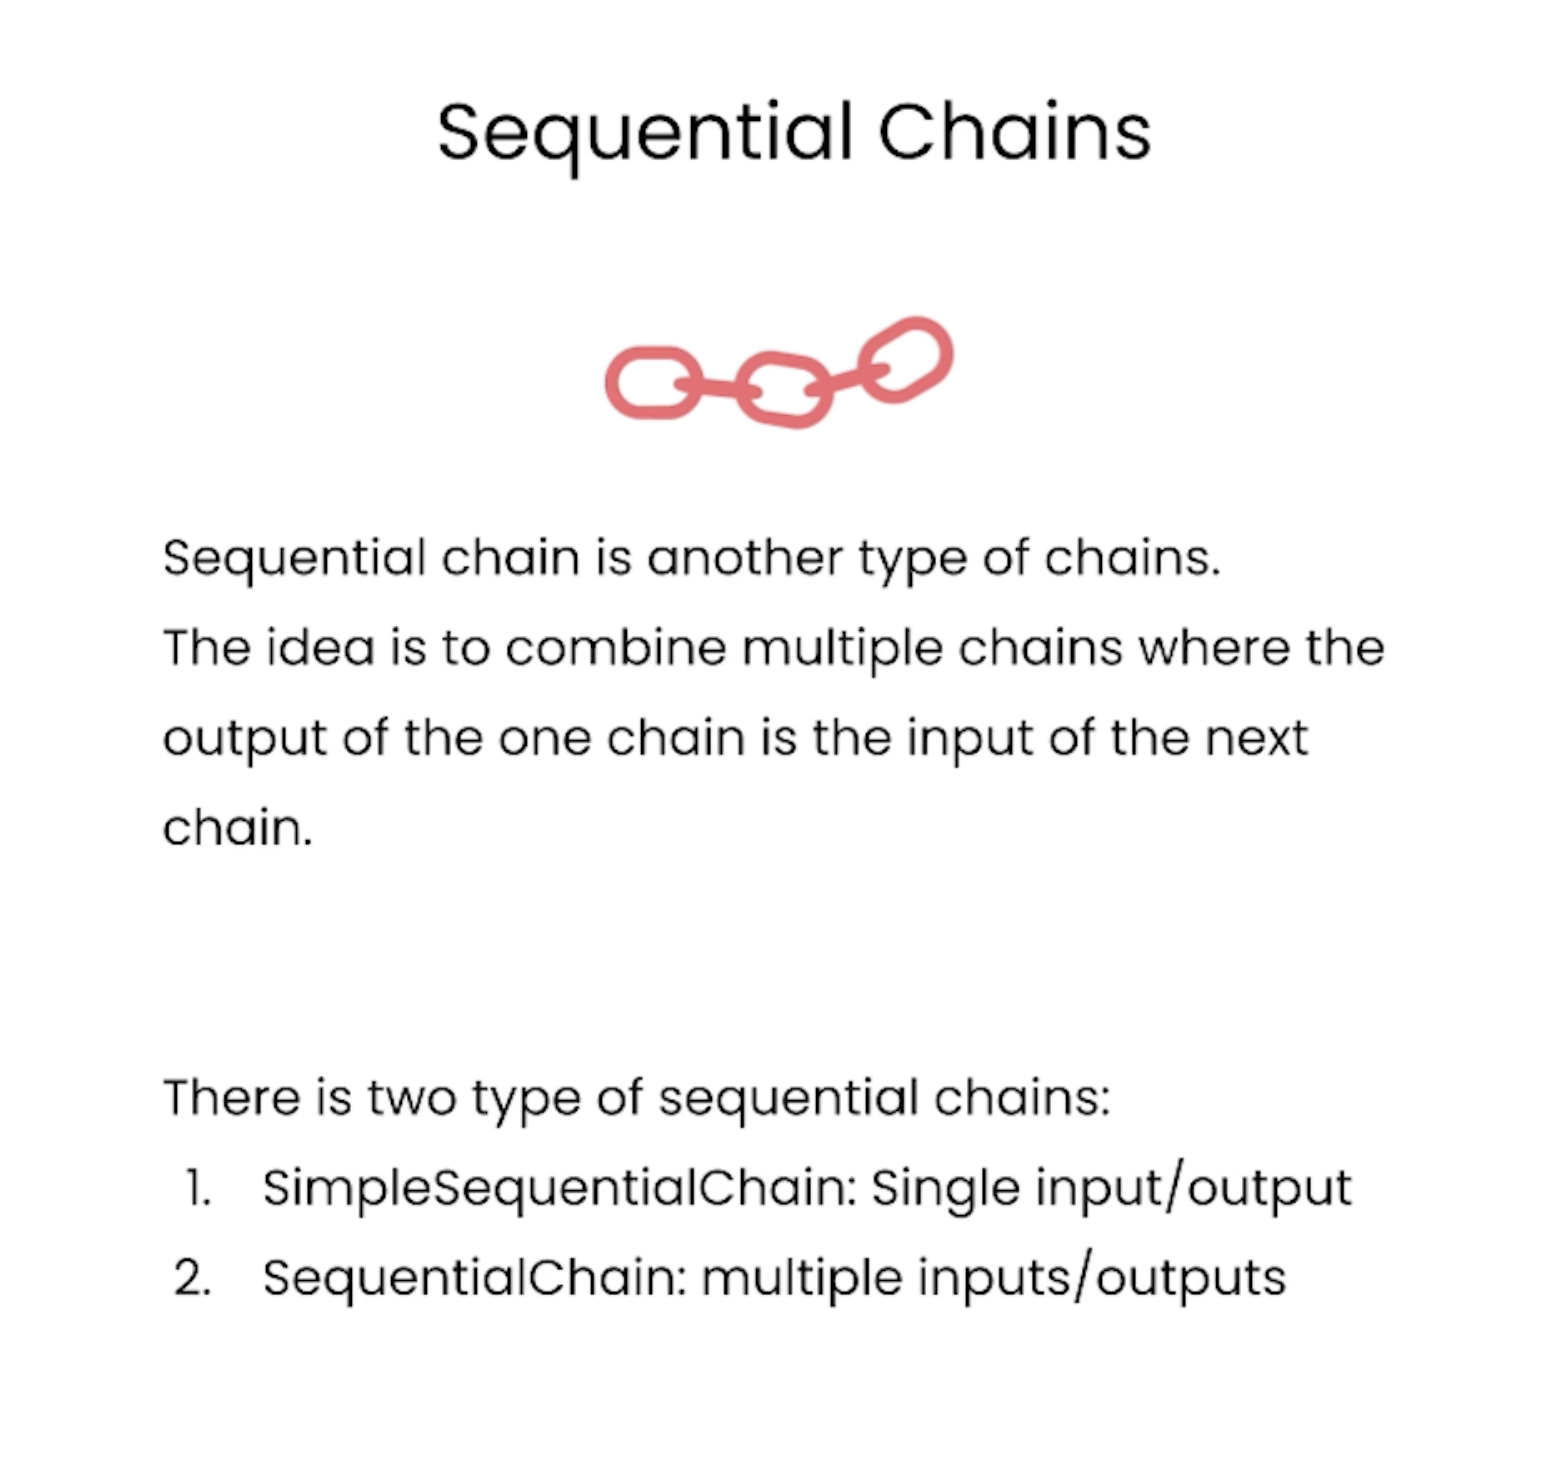

In [15]:
from langchain.chains import SimpleSequentialChain

In [26]:
llm = ChatOpenAI(temperature=0.9)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt,verbose=True)

In [27]:

# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt,verbose=True)

In [28]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [29]:
overall_simple_chain.invoke(product)



> Entering new SimpleSequentialChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Human: What is the best name to describe     a company that makes Queen Size Sheet Set?

> Finished chain.
Regal Linens


> Entering new LLMChain chain...
Prompt after formatting:
Human: Write a 20 words description for the following     company:Regal Linens

> Finished chain.
Regal Linens offers luxurious bedding, bath linens, and home accessories to bring elegance and comfort to your living space.

> Finished chain.


{'input': 'Queen Size Sheet Set',
 'output': 'Regal Linens offers luxurious bedding, bath linens, and home accessories to bring elegance and comfort to your living space.'}

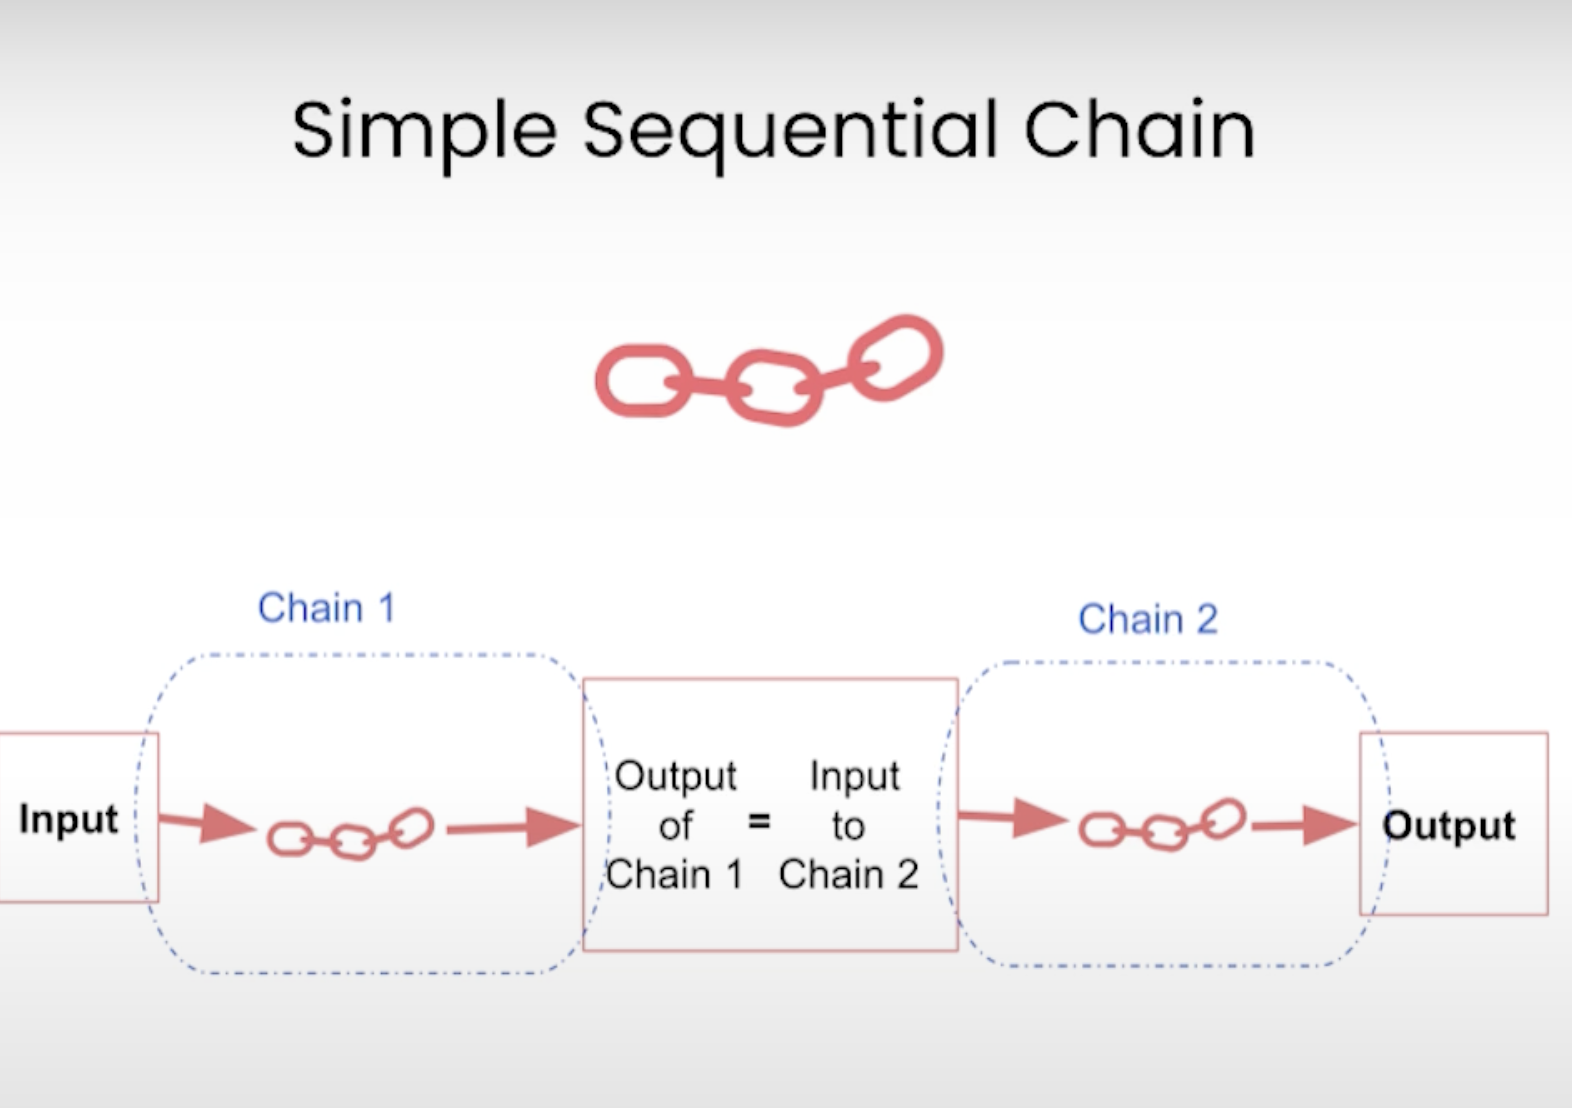

## SequentialChain

In [30]:
from langchain.chains import SequentialChain

In [31]:
llm = ChatOpenAI(temperature=0.9)

# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt,
                     output_key="English_Review"
                    )


In [32]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt,
                     output_key="summary"
                    )


In [33]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )


In [34]:

# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [35]:
# overall_chain: input= Review
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

In [37]:
review = df.Review[5]
overall_chain.invoke(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?",
 'English_Review': "I find the taste mediocre. The foam does not hold, it's weird. I buy the same ones in stores and the taste is much better... Old batch or counterfeit!?",
 'summary': 'The reviewer is disappointed with the taste and quality of the product, suggesting that it may be an old batch or counterfeit.',
 'followup_message': "Cher client, nous sommes désolés d'apprendre que vous n'êtes pas satisfait de notre produit. Nous vous assurons que notre entreprise suit des procédures strictes de contrôle de la qualité pour éviter les contrefaçons et s'assurer que nos produits sont frais. Nous allons enquêter sur cette situation et espérons pouvoir rectifier cela rapidement. Votre satisfaction est notre priorité. Merci pour votre retour."}

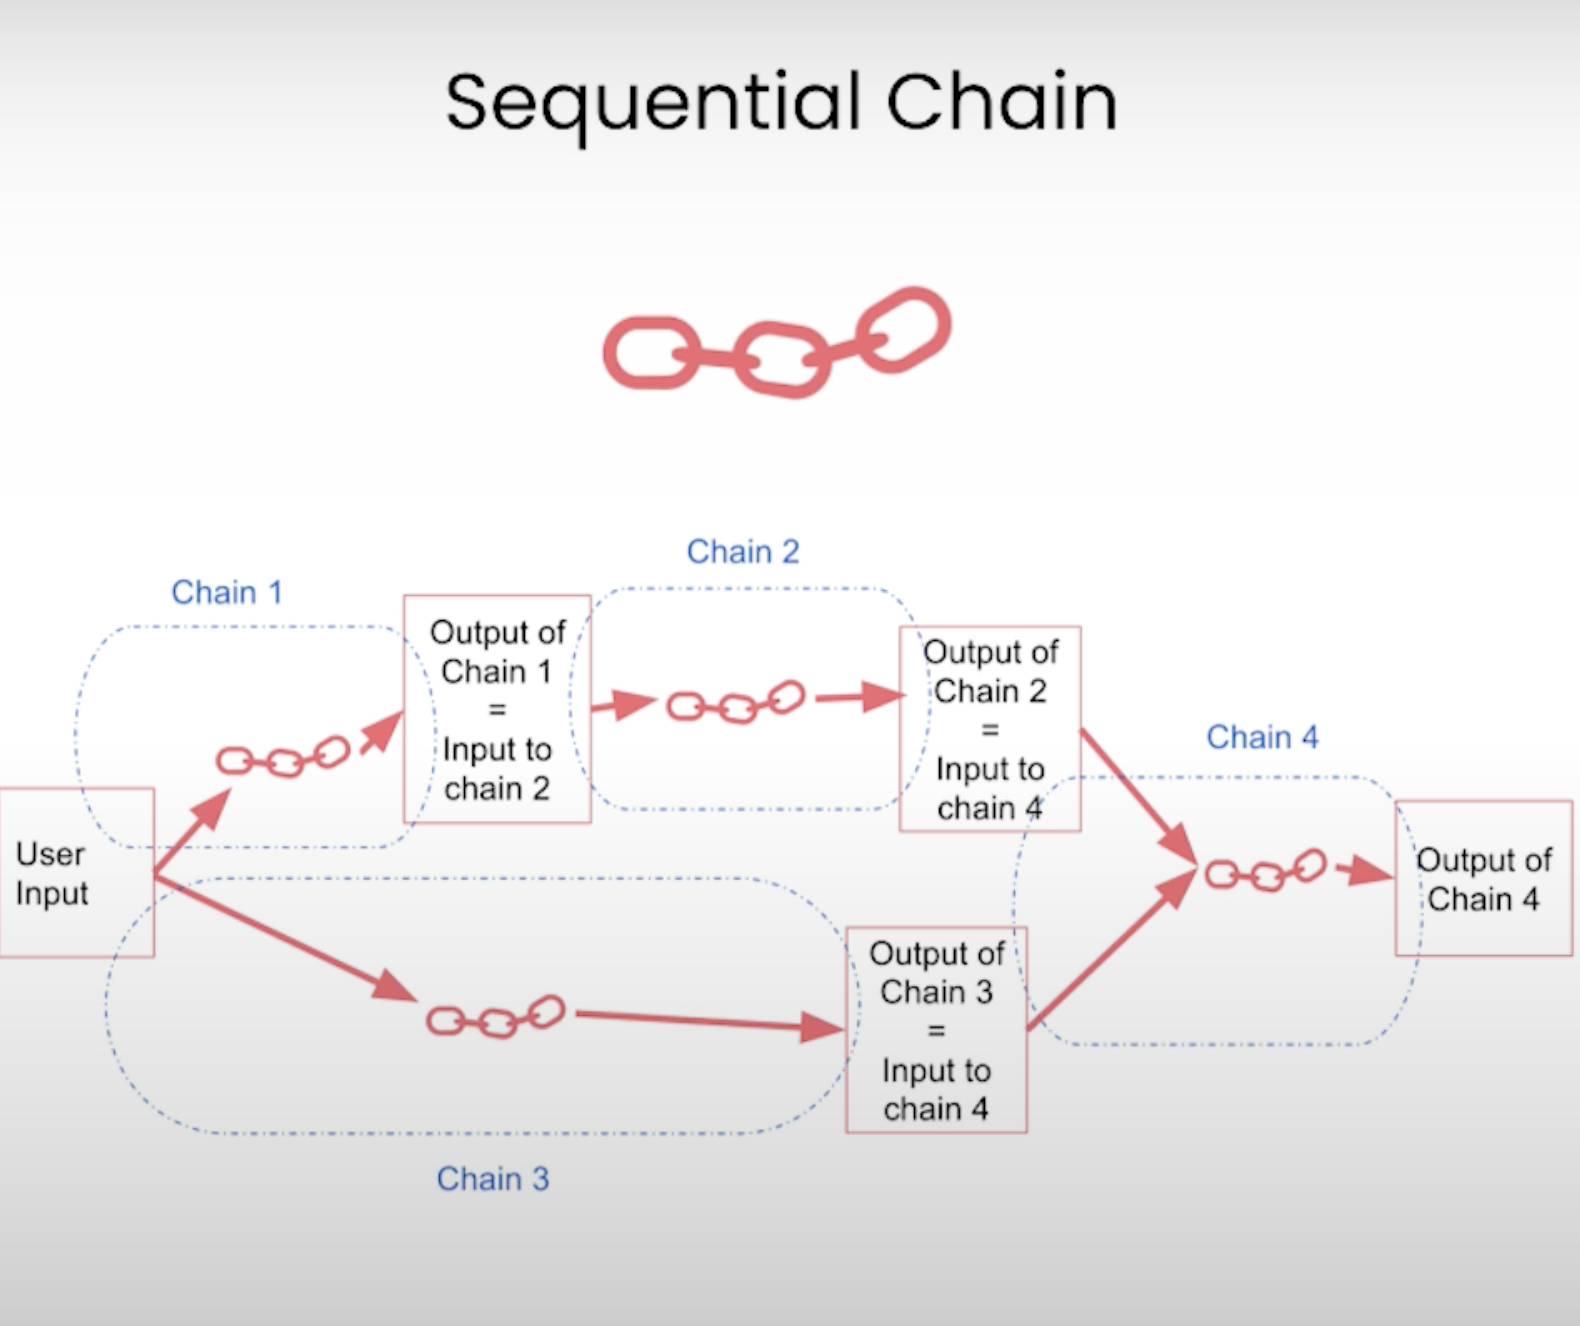

## Router Chain

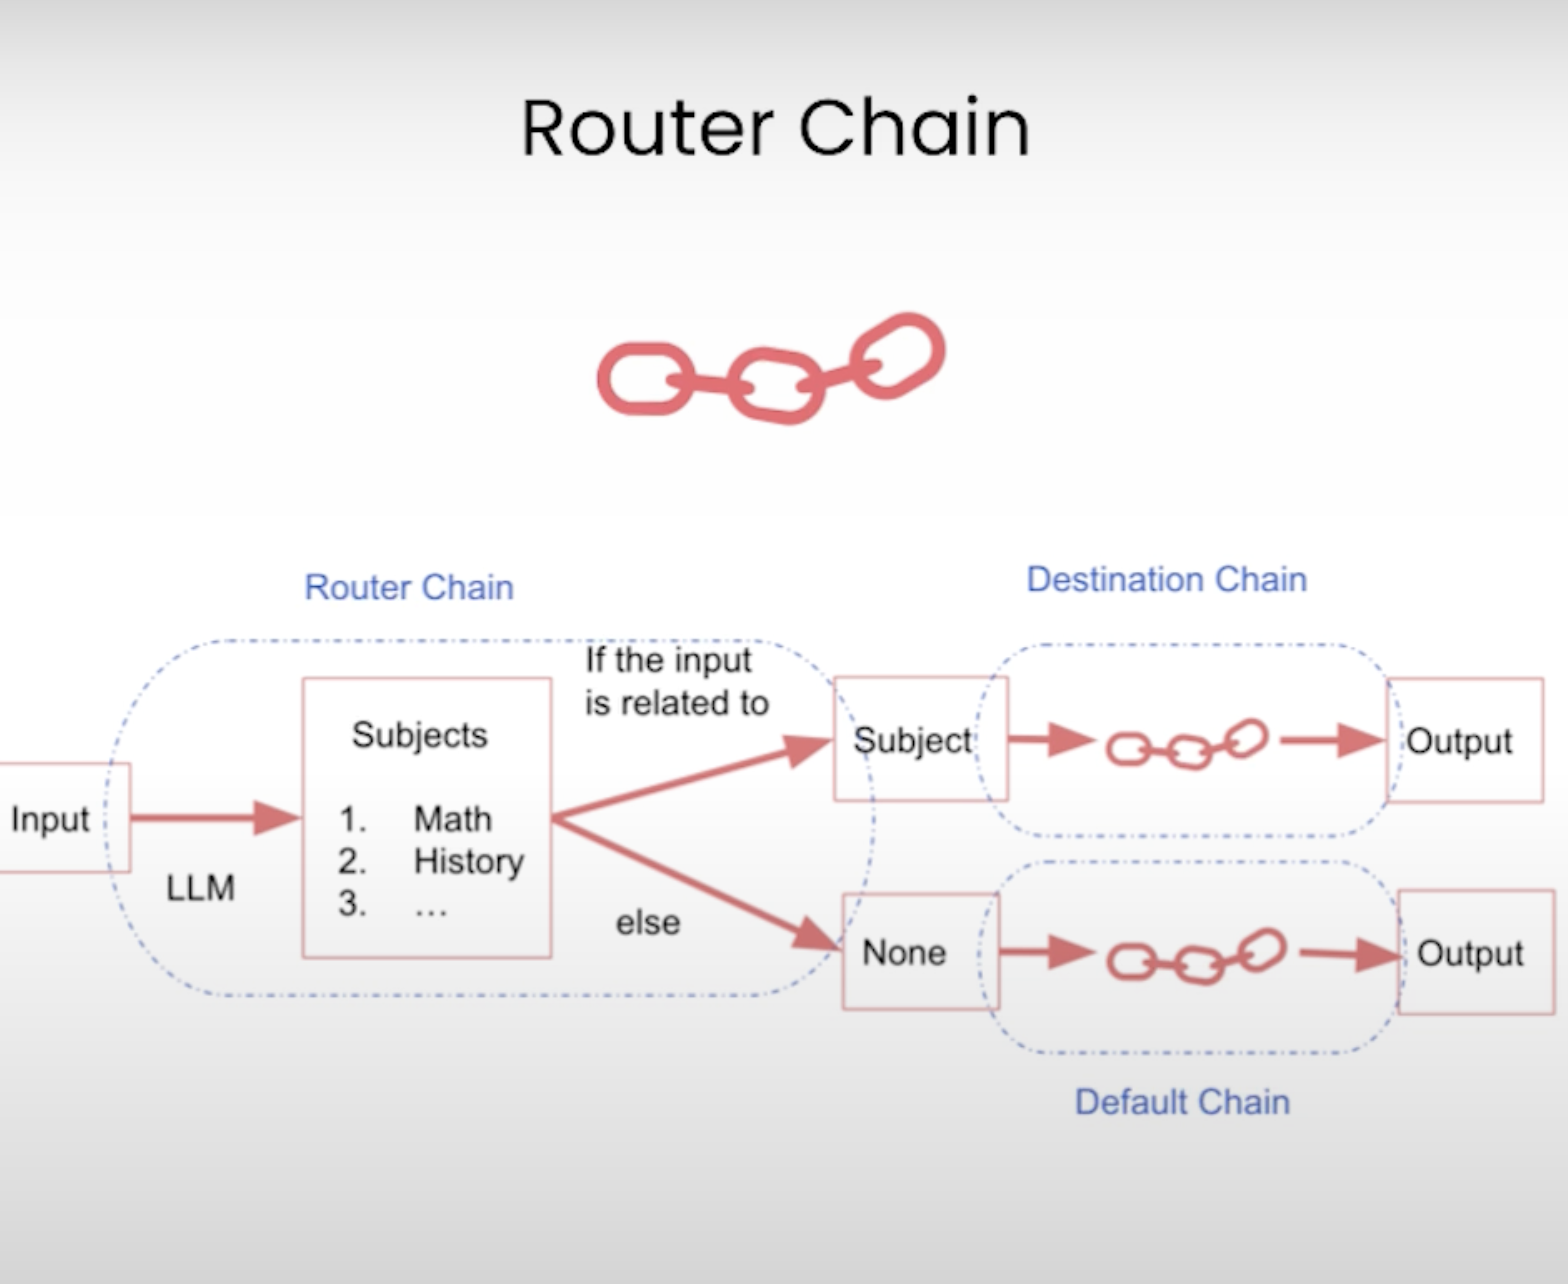

In [38]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts,
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity.

Here is a question:
{input}"""

In [84]:
prompt_infos = [
    {
        "name": "physics",
        "description": "Good for answering questions about physics",
        "prompt_template": physics_template
    },
    {
        "name": "math",
        "description": "Good for answering math questions",
        "prompt_template": math_template
    },
    {
        "name": "History",
        "description": "Good for answering history questions",
        "prompt_template": history_template
    },
    {
        "name": "computer science",
        "description": "Good for answering computer science questions",
        "prompt_template": computerscience_template
    }
]

In [40]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [41]:
llm = ChatOpenAI(temperature=0)

In [85]:

destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [73]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [97]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "default"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" must be one of the candidate prompts specified below.\
If "destination" not matched it should be "default" destination
If the input is not well suited for any of the candidate prompts, it should be "default".

REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [98]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [99]:
chain = MultiPromptChain(router_chain=router_chain,
                         destination_chains=destination_chains,
                         default_chain=default_chain, verbose=True
                        )

In [82]:
chain.invoke("What is black body radiation?")



> Entering new MultiPromptChain chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


{'input': 'What is black body radiation?',
 'text': "Black body radiation is the electromagnetic radiation emitted by a perfect absorber of radiation, known as a black body. A black body absorbs all incoming radiation and emits radiation across the entire electromagnetic spectrum. The spectrum of black body radiation is continuous and follows a specific distribution known as Planck's law. This phenomenon is important in understanding the behavior of objects at different temperatures and is a key concept in the field of thermal physics."}

In [51]:
chain.invoke("what is 2 + 2")



> Entering new MultiPromptChain chain...
math: {'input': 'what is 2 + 2'}
> Finished chain.


{'input': 'what is 2 + 2',
 'text': 'Thank you for the compliment! The answer to the question "what is 2 + 2" is 4.'}

In [100]:
chain.invoke("Why does every cell in our body contain DNA?")



> Entering new MultiPromptChain chain...
None: {'input': 'Why does every cell in our body contain DNA?'}
> Finished chain.


{'input': 'Why does every cell in our body contain DNA?',
 'text': 'Every cell in our body contains DNA because DNA carries the genetic information that determines the characteristics and functions of an organism. DNA contains the instructions for building and maintaining an organism, including the proteins that are essential for cell structure and function. This genetic information is passed down from parent to offspring and is essential for the growth, development, and functioning of all cells in the body. Having DNA in every cell ensures that the genetic information is preserved and can be used to carry out the necessary processes for life.'}